In [120]:
import os
import re
from pathlib import Path
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [4]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [5]:
def is_gzip_file(filepath):
    with open(filepath, 'rb') as f:
        return f.read(2) == b'\x1f\x8b'
def display_all(df):
    plot_cols = df.columns
    plot_features = df[plot_cols]
    plot_features.index = df.index
    _ = plot_features.plot(subplots=True)

    plot_features = df[plot_cols][:960]
    plot_features.index = df.index[:960]
    _ = plot_features.plot(subplots=True)

In [107]:
csv_path = tf.keras.utils.get_file(
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/sis_selected_timeseries.csv.tar.gz')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/utci_selected_timeseries.csv.tar.gz')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/era5-hourly_timeseries.csv.tar.gz')
    origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/era5-land_timeseries.csv.tar.gz')
csv_path

3102150/3102150 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step


'/Users/watcharinsarachai/.keras/datasets/era5-land_timeseries.csv.tar.gz'

In [108]:
date_col = 'datetime' 
if is_gzip_file(csv_path):
  # Read the data directly into a pandas DataFrame
  df = pd.read_csv(csv_path, compression='gzip')
else:
  # Read the data without compression
  df = pd.read_csv(csv_path)
df = df.rename(columns={df.columns[0]: date_col})

# Ensure timestamp column is datetime type
if df[date_col].dtype != 'datetime64[ns]':
    df[date_col] = pd.to_datetime(df[date_col])
    
row_count = df.shape[0]
print(f"Total rows: {row_count}")
df.head(5)

Total rows: 32017


,datetime,t2m,fal,slhf,ssr,str,sshf,ssrd,strd,u10,v10,sp,tp
0,2021-12-31 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-12-31 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-12-31 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-12-31 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-12-31 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
if 'lowAccSis' in df.columns:
    df.pop('lowAccSis')
df.head(5)

,datetime,t2m,fal,slhf,ssr,str,sshf,ssrd,strd,u10,v10,sp,tp
0,2021-12-31 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-12-31 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-12-31 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-12-31 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-12-31 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
print(df[date_col].dt.year.unique())
print(df[date_col].dt.year.value_counts())

[2021. 2022. 2023. 2024. 2025.   nan]
datetime
2022.0    8424
2023.0    8352
2024.0    8352
2025.0    6865
2021.0      23
Name: count, dtype: int64


In [111]:
df.shape

(32017, 13)

In [112]:
# Sort by time if it exists
df.index = df[date_col]
df.pop(date_col)
df = df.sort_index()
print(df.shape)
df.head(5)

(32017, 12)


,t2m,fal,slhf,ssr,str,sshf,ssrd,strd,u10,v10,sp,tp
datetime,,,,,,,,,,,,
2021-12-31 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
print(df.index.year.unique())
print(df.index.year.value_counts())

Index([2021.0, 2022.0, 2023.0, 2024.0, 2025.0, nan], dtype='float64', name='datetime')
datetime
2022.0    8424
2023.0    8352
2024.0    8352
2025.0    6865
2021.0      23
Name: count, dtype: int64


In [114]:
print(df.index.min())
print(df.index.max())

2021-12-31 01:00:00
2025-10-26 00:00:00


In [115]:
# Try inference first
interval_time = pd.infer_freq(df.index)
print(interval_time)

if interval_time is None:
    delta = df.index.to_series().diff().dropna()
    d = delta.mode().iloc[0] if not delta.mode().empty else delta.median()
    if d % pd.Timedelta(days=1) == pd.Timedelta(0):
        interval_time = 'D'
    elif d % pd.Timedelta(hours=1) == pd.Timedelta(0):
        interval_time = f"{int(d / pd.Timedelta(hours=1))}h"
    elif d % pd.Timedelta(minutes=1) == pd.Timedelta(0):
        interval_time = f"{int(d / pd.Timedelta(minutes=1))}min"
    else:
        interval_time = f"{int(d.total_seconds())}s"
print(interval_time)

start_date = df.index.min().floor(interval_time)
end_date = df.index.max().floor(interval_time)
complete_index = pd.date_range(start=start_date, end=end_date, freq=interval_time)
print(complete_index.shape)
print(complete_index.min())
print(complete_index.max())

None
1h
(33480,)
2021-12-31 01:00:00
2025-10-26 00:00:00


In [116]:
# Create a DataFrame with the complete index
df_complete = pd.DataFrame(index=complete_index)
# Join with original data
df_with_all_times = df_complete.join(df)

print(df.shape)
print(df_with_all_times.shape)

df_with_all_times.head(5)

(32017, 12)
(33576, 12)


,t2m,fal,slhf,ssr,str,sshf,ssrd,strd,u10,v10,sp,tp
2021-12-31 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-31 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
# Print missing data statistics
missing_count = df_with_all_times.isna().any(axis=1).sum()
print(f"Found {missing_count} missing timestamps out of {len(complete_index)} expected")

Found 1560 missing timestamps out of 33480 expected


In [118]:
# Fill missing values using multiple methods
df_filled = df_with_all_times.copy()

# Interpolate small gaps (up to 1 hour = 4 timestamps)
df_filled = df_filled.interpolate(method='time', limit=4)

In [119]:
# Print missing data statistics
missing_count = df_filled.isna().any(axis=1).sum()
print(f"Found {missing_count} missing timestamps out of {len(complete_index)} expected")

Found 1400 missing timestamps out of 33480 expected


In [97]:
plot_cols = list(df.columns)
plot_cols

['cc', 'r', 'q', 't', 'u', 'v']

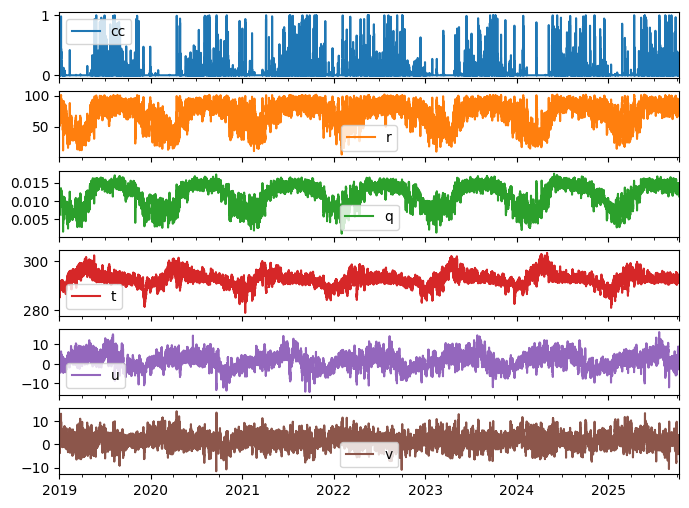

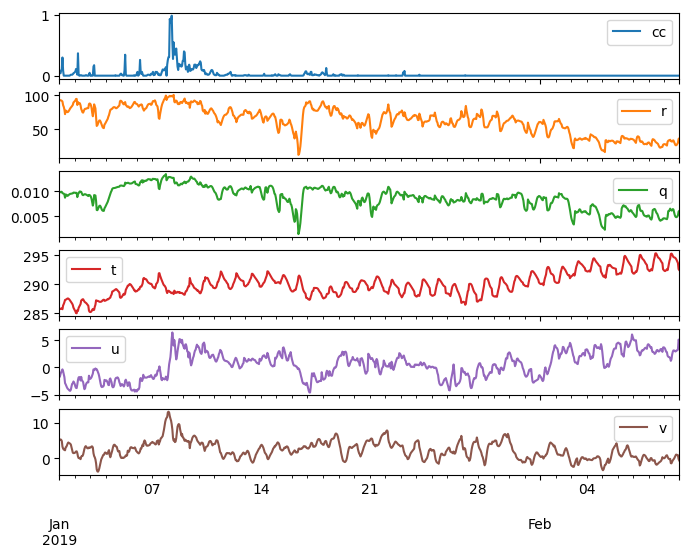

In [98]:
plot_features = df_filled[plot_cols]
plot_features.index = complete_index
_ = plot_features.plot(subplots=True)

plot_features = df_filled[plot_cols][:960]
plot_features.index = complete_index[:960]
_ = plot_features.plot(subplots=True)

In [99]:
nan_rows = df_filled[df_filled.isna().any(axis=1)]
nan_rows

,cc,r,q,t,u,v


In [100]:
# Replace all NaN values in the DataFrame with 0
df_filled = df_filled.fillna(0)

In [101]:
# Count NaNs in each column
print(df_filled.isna().sum())

cc    0
r     0
q     0
t     0
u     0
v     0
dtype: int64


In [102]:
df_filled.min()

cc      0.000000
r       5.147584
q       0.000937
t     278.764058
u     -14.456272
v     -11.579796
dtype: float64

In [103]:
df_filled.max()

cc      1.000000
r     101.829502
q       0.017467
t     303.340049
u      16.371889
v      14.128016
dtype: float64

In [104]:
len(df_filled)

59399

In [105]:
filename = Path(csv_path).name
base = re.split(r'\.', filename, 1)[0]
print(base)

era5-hourly_timeseries


In [106]:
# Compressed CSV
df_filled.to_csv(base + '.csv')